### **Residual Analysis**

[Actual Price - Predicted Price]

Key Assumptions to check with residuals:
    
    1:Linearity
    2:Constant Variance(Homoscedasticity)
    3:Normality
    4:Independence

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
california=fetch_california_housing()
df=pd.DataFrame(california.data, columns=california.feature_names)
df['Price']=california.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
x=df.drop('Price',axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [8]:
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nMAE: {mae:.2f} $100k")
print(f"RMSE: {rmse:.2f} $100k")
print(f"R2: {r2:.2f}")


MAE: 0.53 $100k
RMSE: 0.75 $100k
R2: 0.58


In [9]:
residuals=y_test-y_pred
print("\nFirst 5 Residuals:")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 Residuals:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


**if the data is positive then underpredicted otherwise overpredicted**

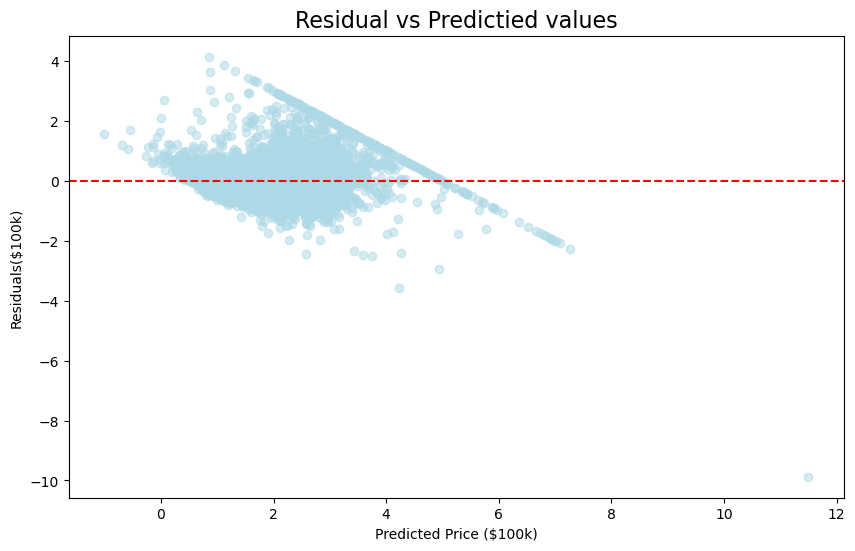

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='lightblue',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residual vs Predictied values',fontsize=16)
plt.xlabel('Predicted Price ($100k)')
plt.ylabel('Residuals($100k)')
plt.show()

## Histogram Of Residuals

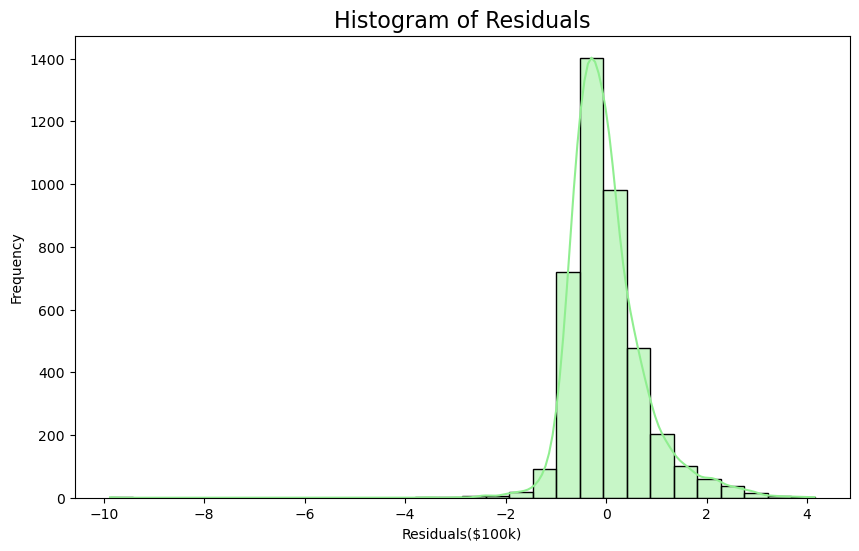

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='lightgreen')
plt.title('Histogram of Residuals',fontsize=16)
plt.xlabel('Residuals($100k)')
plt.ylabel('Frequency')
plt.show()

## Q-Q Plot(Normality Check)

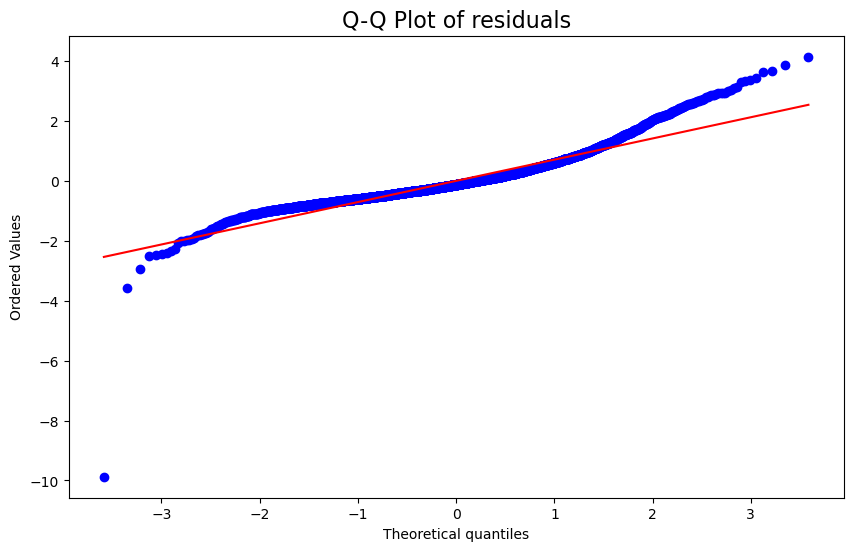

In [26]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist="norm",plot=plt)
plt.title('Q-Q Plot of residuals',fontsize=16)
plt.show()

## **What to look for:**

   **Good**: points follow the red line 
   
   **Bad**: Big deviations especially at end

## Interpret residual analysis: 

- Linearity

- Constant Variance
  
- Normality

- Takeaway

# Standardization vs Normalization

## Standardization

=> the mean is 0 and the sd is 1

## Normalization(Min-Max Scaling)

=> transforming data into a fixed range, typically [0,1] or [-1,1]

# Cross-Validation

=>To evaluate the performance of a machine learning model

**Why Use :**
- Prevents Overfitting
- Evaluated on diff subsets
- Provides a reliable performance

**How it works :**
- Split into k-equal sized folds
- Train the model on k-1 folds and test on remaining folds
- Repeat the process k times
- Compute the average performance across all k iterations

In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=100,n_features=2,noise=20)
kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()
scores=cross_val_score(model,x,y,cv=kf,scoring='r2')
print("Cross-validation scores:",scores)
print("Average r2 score:",scores.mean())

Cross-validation scores: [0.96874119 0.94283727 0.92857885 0.98090445 0.93109519]
Average r2 score: 0.9504313891106143


## On California DataSet performing Cross_validation

In [45]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
x=df[['MedInc']]
y = df[['Price']]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("Cross-validation scores:", scores)
print("Average R2 score:", scores.mean())


Cross-validation scores: [0.57578771 0.61374822 0.60856043 0.62126494 0.5875292 ]
Average R2 score: 0.6013781013684618


# Ridge Regression

=> Ridge Regression is linear regression with a rule to keep the predictions steady and avoid overfitting